Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Bioinformatika 1

### 1. Čitanje podataka

JELEN 5-6 =  16.0 Number of alignments: 1
JELEN 6-7 =  26.0 Number of alignments: 1
JELEN 5-7 =  30.0 Number of alignments: 1
[623, 943, 1165, 1271, 1350, 1394, 1427, 1438, 1454, 1466, 1478, 1559, 1582, 1630, 1699, 1772, 1852, 1962, 2089, 2215, 2303, 2384, 2426, 2469, 2523, 2581, 2624, 2746, 2817, 2932, 3062, 3180]
[18, 63, 118, 185, 246, 294, 333, 363, 381, 402, 418, 434, 527, 557, 636, 727, 1447, 1822, 2069, 2244, 2367, 2444, 2504, 2525, 2563, 2608, 2655, 2966, 3143, 3405, 3592, 3779]
[0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 20, 35, 132, 185, 230, 285, 333, 375, 436, 491, 528, 546, 568, 587, 604, 686, 793, 902, 1127, 1921, 2387]


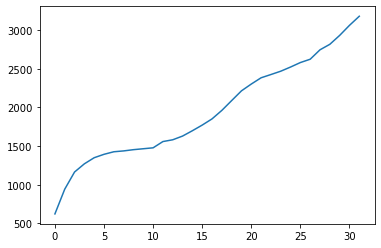

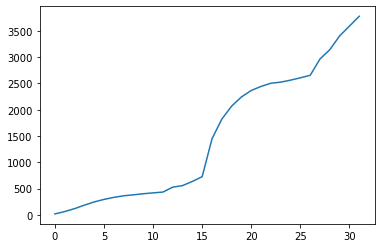

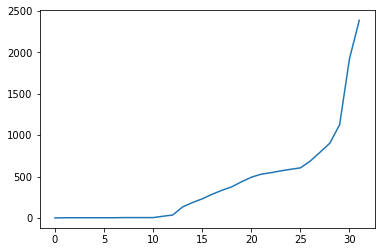

In [209]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))
    
#from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 1
#aligner.mismatch_score = 0.0
aligner.open_gap_score = -1
aligner.extend_gap_score = -1
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


alignments = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))

data = list(SeqIO.parse(pathFASTQ, "fastq"))

for i in range(3):
    readings=[0] * 32

    for sequence in data:
        alignments = aligner.align(expected[i].seq,sequence.seq)
        distance= int(min(len(expected[i].seq),len(sequence.seq))-alignments[0].score)
        for k in range(32):
            if distance <=k:
                readings[k]+=1
    #print(readings)
    plt.subplots()
    plt.plot(readings)


14
18
12
46
21
14
26
35
23
20
12
18
9
20
18
18
39
47
10
13
10
18
18
18
19
18
20
18
18
19
19
22
18
18
18
17
17
20
21
18
17
18
24
27
19
21
27
12
16
12
14
16
15
16
15
16
16
10
9
9
12
10
9
10
10
16
11
11
10
10
10
9
13
10
10
11
10
23
19
34
6
30
20
28
20
24
12
23
10
24
19
21
20
6
7
28
32
20
13
14
18
19
4
19
13
40
18
4
3
19
20
15
19
16
19
18
24
23
22
22
21
20
20
19
24
10
31
16
15
15
15
15
16
17
16
16
16
16
21
17
19
16
16
18
10
14
10
23
15
19
21
19
16
17
10
10
11
9
10
10
10
12
12
11
12
13
9
14
12
12
10
12
10
10
10
11
10
13
12
9
10
3
6
33
38
44
23
2
37
14
13
3
40
44
20
40
45
25
21
19
30
22
22
20
21
23
16
3
40
20
4
7
18
15
35
25
43
18
18
21
20
20
38
20
5
17
20
19
17
21
21
17
24
18
19
15
16
14
20
58
22
18
15
16
15
16
14
16
15
15
12
12
17
15
16
16
16
15
20
18
10
14
14
20
10
16
14
15
15
12
9
10
16
9
17
12
14
39
3
4
21
22
23
36
4
37
35
10
21
36
30
25
46
17
45
29
34
4
20
21
29
40
10
20
11
29
45
18
34
23
4
7
21
20
38
38
32
19
33
39
18
21
5
7
25
35
16
17
6
24
23
16
19
16
2
48
18
20
19
19
28
2
43
40
10


36
15
37
16
12
11
32
19
3
5
38
54
36
4
6
16
39
2
43
25
2
41
12
15
34
12
35
38
37
13
41
52
12
41
34
28
20
22
39
2
17
3
37
36
47
34
45
40
5
4
39
38
45
3
39
27
22
4
6
41
40
2
3
2
35
14
49
5
36
38
25
22
2
2
44
14
30
26
19
2
44
31
2
4
3
39
4
6
15
40
3
38
15
38
36
32
2
38
2
21
20
40
38
2
46
39
4
6
37
5
12
2
29
2
43
34
31
42
37
7
38
45
33
31
35
2
5
6
2
43
21
38
32
3
3
38
37
39
16
3
2
31
16
31
3
38
2
38
38
5
32
24
34
3
12
40
39
5
51
41
35
40
22
44
36
3
29
36
42
45
36
51
43
39
40
2
34
31
34
35
34
12
38
12
45
22
4
47
2
12
3
38
2
3
16
4
29
33
2
3
39
29
3
35
10
37
35
45
45
5
51
14
4
36
32
7
38
47
39
4
35
31
40
66
40
2
39
4
37
50
18
13
23
41
33
26
20
35
12
2
2
2
4
39
6
23
35
7
3
2
40
2
36
44
13
27
41
39
4
3
7
2
35
45
48
44
38
38
2
3
13
33
2
33
28
35
44
36
28
4
43
38
28
2
26
46
2
3
18
38
2
27
40
2
36
46
2
12
22
2
39
32
43
29
3
4
38
10
25
39
35
32
2
35
23
31
30
15
6
35
2
61
31
56
35
47
35
50
55
10
46
40
36
33
47
16
39
37
3
38
36
35
29
35
47
41
48
6
47
20
22
38
45
32
3
38
36
14
5
33
20
29
24
33
19
7
2

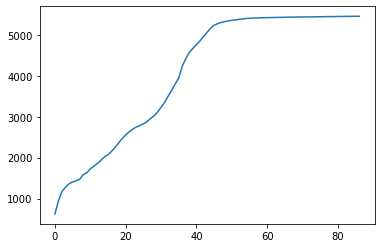

In [56]:
data = list(SeqIO.parse(pathFASTQ, "fastq"))
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
i = 0
#aligner.mismatch_score = 0
#aligner.gap_score = -1

#print(len(expected[i].seq), alignments[0].score)
t = []
m = len(expected[i].seq)
for sequence in data:
    #alignments = aligner.align(expected[i].seq,sequence.seq)
    alignements = pairwise2.align.globalxs(expected[0].seq, sequence.seq, open=-1, extend=0)[0].score
    distance=  min(len(sequence.seq),m) - abs(int(alignements))
    print(distance)
    t.append(distance)
    #print(distance)

dic = {}
for t1 in t:
    if(t1 not in dic):
        dic[t1] = 0
    dic[t1] += 1
test = 0
rew = []
for i in sorted(dic):
    print(i, dic[i])
    test+= dic[i]
    rew.append(test)

plt.plot(rew)

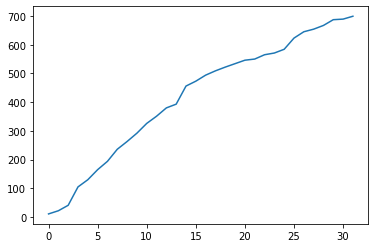

In [49]:
test = 0
#rew = []
#for i in sorted(dic):
    #print(i, dic[i])
    #test+= dic[i]
    #rew.append(test)
t1 = []
num = 0
for i in rew:
    num += 1
    if(num <= 32):
        t1.append(i)
plt.plot(t1)

1 2
7 2
17 1
18 1
19 2
20 2
21 2
22 1
23 1
24 3
25 1
26 22
27 58
28 64
29 84
30 711
31 375
32 240
33 122
34 73


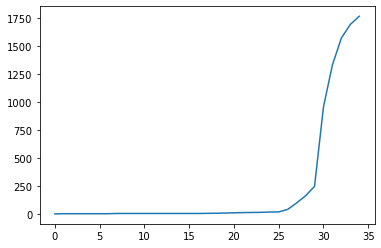

In [202]:
suma = 0
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
aligner.match_score = 1.0
aligner.mismatch_score = 0.0
aligner.open_gap_score = -1
aligner.extend_gap_score = -0.5
aligner.target_end_gap_score = -0.0
aligner.query_end_gap_score = -0.5
dic = {}
for sequence in data:
    alignments = aligner.align(expected[2].seq,sequence.seq)
    #print(min(len(expected[0].seq),len(sequence.seq)), alignments[0].score)
    
    distance = min(len(expected[2].seq),len(sequence.seq)) - int(alignments[0].score)
    #if(distance < 0):
        #distance = 0
    if(distance not in dic):
        dic[distance] = 0
    dic[distance] += 1

test = []
n = 0

    

for i in range(35):
    
    if(i in dic):
        print(i, dic[i])
        n += dic[i]
    test.append(n)
    
plt.plot(test)
#for i in alignments:
#    print(i)
#for i, j in zip(expected[1].seq, expected[0].seq):
 #   if(i!=j):
  #      suma += 1
#print(suma)

In [140]:
Align.PairwiseAligner(match_score=1.0)
aligner.mismatch_score = 0
aligner.gap_score = -1

print(249-aligner.score(expected[0].seq,expected[1].seq))
print(249-aligner.score(expected[1].seq,expected[2].seq))
print(249-aligner.score(expected[0].seq,expected[2].seq))

print(aligner.score(data[0].seq,expected[0].seq))


16.0
26.0
30.0
-179.0


In [47]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Align import substitution_matrices
print(249-pairwise2.align.globalxs(expected[0].seq, expected[1].seq, open=-1, extend=0)[0].score)
print(249-pairwise2.align.globalxs(expected[1].seq, expected[2].seq, open=-1, extend=0)[0].score)
print(249-pairwise2.align.globalxs(expected[0].seq, expected[2].seq, open=-1, extend=0)[0].score)
 #   print(format_alignment(a))

16.0
26.0
30.0


JELEN 5-6 =  12.0 Number of alignments: 359424
JELEN 6-7 =  22.0 Number of alignments: 564013891584
JELEN 5-7 =  24.0 Number of alignments: 3530674667520


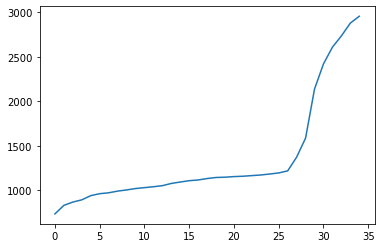

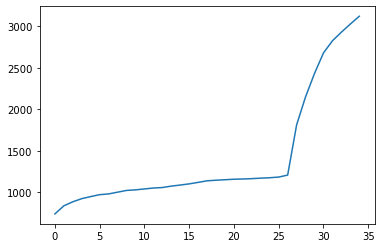

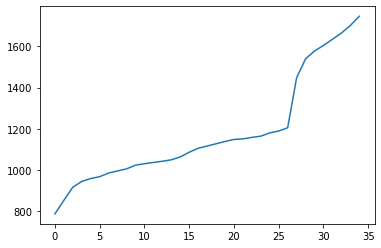

In [31]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))
    
#from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'


alignments = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))
alignments = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-alignments[0].score, "Number of alignments: %d" % len(alignments))

data = list(SeqIO.parse(pathFASTQ, "fastq"))

for i in range(3):
    readings=[0] * 35

    for sequence in data:
        alignments = aligner.align(expected[i].seq,sequence.seq)
        distance= int(len(sequence.seq)-alignments[0].score)
        for k in range(35):
            if distance <=k:
                readings[k]+=1
    plt.subplots()
    plt.plot(readings)

In [ ]:
data = list(SeqIO.parse(pathFASTQ, "fastq"))

aligner.mismatch_score = -1
aligner.gap_score = 0

#for i in range(3):
readings=[0] * 32
readings1=[0] * 32

dic1 = {}
t = []

cnula = 0
i = 0

#print(len(expected[i].seq), alignments[0].score)

for sequence in data:
    alignments = aligner.align(expected[i].seq,sequence.seq)
    
    distance= min(len(sequence.seq), len(expected[i].seq)) - int(alignments[0].score)
    t.append(distance)
    #print(min(len(sequence.seq), len(expected[i].seq)),     alignments[0].score,     distance)
    #if(distance not in dic1):
    #    dic1[distance] = 0
    #dic1[distance] +=1
    if(distance < 32):
        readings1[distance]+=1
        if(distance not in dic1):
            dic1[distance] = 0
        dic1[distance] +=1
print(len(t))

t3={}
for t1 in sorted(t):
    if(t1 not in t3):
        t3[t1] = 0
    t3[t1] += 1
dic2 = {}

print(t3)
r = [0]
for key in sorted(dic1):
    #print("%s: %s" % (key, dic1[key]))
    r.append(key+r[len(r)-1])
    if(dic1[key] not in dic2):
        dic2[dic1[key]] = 0
    dic2[dic1[key]] += key
    
#print(sorted(t))
#print(len(dic2))

#for key in sorted(dic2):
#    print("%s: %s" % (key, dic2[key]))
    
test = 0
for k in readings1:
    test += k
    #print(test)
plt.subplots()
plt.plot(t3)

In [93]:
dic = {}
for sequence in data:
    t1 = sequence.seq
    t = int(pairwise2.align.globalxs(expected[0].seq, t1, open=0, extend=0)[0].score)
    rez = min(249, len(t1))-t#-abs(249-len(t1))
    if(rez not in dic):
        dic[rez] = 0
    dic[rez]+=1




In [94]:
for i in sorted(dic):
    print(i, dic[i])

0 1635
1 515
2 145
3 49
4 58
5 33
6 17
7 27
8 25
9 28
10 84
11 137
12 110
13 81
14 36
15 28
16 23
17 36
18 32
19 25
20 26
21 26
22 21
23 19
24 21
25 18
26 28
27 157
28 202
29 544
30 277
31 183
32 123
33 137
34 69
35 50
36 60
37 227
38 66
39 21
40 16
41 5
42 5
43 5
44 1
45 2
46 2
48 2
49 2
50 3
53 2
56 2
57 2
59 1
71 1
83 1
84 1
90 1
94 1
96 1
101 1
107 2
